In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import tensorflow as tf
import keras.backend as K
from keras.utils import to_categorical
from keras import metrics
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout,Maximum
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose,Conv3D,Conv3DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D,MaxPooling3D
from keras.layers import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from sklearn.utils import class_weight


from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
from keras.layers import PReLU

import os
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
# from medpy.io import load
import numpy as np

#import cv2
import nibabel as nib
from PIL import Image


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         val=os.path.join(dirname, filename)
#         test_mask=np.load(val)
#         test_mask = to_categorical(test_mask , num_classes = 4)
#         print(test_mask.shape)
#         print(temp.shape())
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
train_img_dir = "/kaggle/input/brats-2019/BraTS_2019_Original/BraTS_2019_Original/image/"
train_mask_dir = "/kaggle/input/brats-2019/BraTS_2019_Original/BraTS_2019_Original/mask/"

train_img_list = sorted(os.listdir(train_img_dir))
train_mask_list =  sorted(os.listdir(train_mask_dir))


In [ ]:
batch_size = 1
(train_img_list,train_mask_list)

(['image_0.npy',
  'image_1.npy',
  'image_10.npy',
  'image_101.npy',
  'image_102.npy',
  'image_103.npy',
  'image_105.npy',
  'image_106.npy',
  'image_107.npy',
  'image_108.npy',
  'image_109.npy',
  'image_110.npy',
  'image_111.npy',
  'image_112.npy',
  'image_113.npy',
  'image_114.npy',
  'image_115.npy',
  'image_116.npy',
  'image_117.npy',
  'image_118.npy',
  'image_119.npy',
  'image_12.npy',
  'image_120.npy',
  'image_121.npy',
  'image_122.npy',
  'image_123.npy',
  'image_124.npy',
  'image_126.npy',
  'image_127.npy',
  'image_129.npy',
  'image_13.npy',
  'image_130.npy',
  'image_131.npy',
  'image_133.npy',
  'image_135.npy',
  'image_136.npy',
  'image_137.npy',
  'image_138.npy',
  'image_139.npy',
  'image_14.npy',
  'image_140.npy',
  'image_141.npy',
  'image_142.npy',
  'image_143.npy',
  'image_144.npy',
  'image_145.npy',
  'image_146.npy',
  'image_147.npy',
  'image_149.npy',
  'image_15.npy',
  'image_150.npy',
  'image_152.npy',
  'image_153.npy',
  

In [ ]:
def load_img(img_dir , img_list):

    images = []
    for i,image_name in enumerate(img_list):

        if(image_name.split('.')[1]=='npy'):
            # if the file is numpy array

            image = np.load(img_dir + image_name)
            images.append(image)

    images = np.array(images)

    return (images)

In [ ]:
def imageLoader(img_dir , img_list , mask_dir , mask_list , batch_size):

    L = len(img_list)

    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:

            limit = min(batch_end , L)

            X = load_img(img_dir , img_list[batch_start:limit]) # load image
            Y = load_img(mask_dir , mask_list[batch_start:limit]) # load mask

            yield(X,Y) # yeilds images - a tuple with 2 numpy arrays with batch_size samples

            batch_start += batch_size
            batch_end += batch_size

In [ ]:
train_img_datagen = imageLoader(train_img_dir, train_img_list,  train_mask_dir, train_mask_list, batch_size)

In [ ]:
img, msk = train_img_datagen.__next__()

In [ ]:
img.shape

(1, 128, 128, 128, 4)

In [ ]:
msk.shape

(1, 128, 128, 128, 4)

In [ ]:
img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

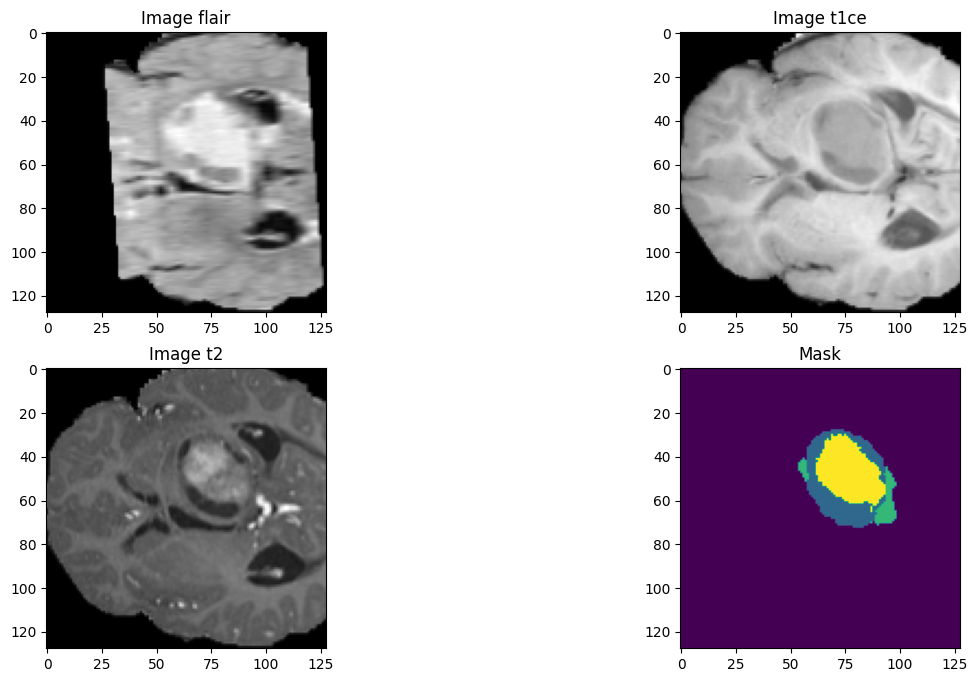

In [ ]:
n_slice=random.randint(0, test_mask.shape[2])
n_slice=55
plt.figure(figsize=(15, 8))


plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
import tensorflow as tf
from keras import layers, models, initializers, Input
from keras.models import Model

kernel_initializer = 'he_uniform'

def dilated_inception_module(inputs, filters):
    conv1 = layers.Conv3D(filters, (1, 1, 1), padding='same', kernel_initializer=kernel_initializer)(inputs)
    conv3_1 = layers.Conv3D(filters, (3, 3, 3), padding='same', dilation_rate=1, kernel_initializer=kernel_initializer)(inputs)
    conv3_2 = layers.Conv3D(filters, (3, 3, 3), padding='same', dilation_rate=2, kernel_initializer=kernel_initializer)(inputs)
    conv3_3 = layers.Conv3D(filters, (3, 3, 3), padding='same', dilation_rate=3, kernel_initializer=kernel_initializer)(inputs)
    output = layers.Concatenate()([conv1, conv3_1, conv3_2, conv3_3])
    return output

def down_block(inputs, filters):
    x = dilated_inception_module(inputs, filters)
    x = layers.Dropout(0.3)(x)  # Added dropout layer
    p = layers.MaxPooling3D((2, 2, 2))(x)
    return x, p

def up_block(inputs, skip, filters):
    x = layers.Conv3DTranspose(filters, (2, 2, 2), strides=(2, 2, 2), padding='same', kernel_initializer=kernel_initializer)(inputs)
    x = layers.Concatenate()([x, skip])
    x = dilated_inception_module(x, filters)
    x = layers.Dropout(0.3)(x)  # Added dropout layer
    return x

def build_dilated_inception_unet(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))

    # Encoder
    x1, p1 = down_block(inputs, 16)
    x2, p2 = down_block(p1, 32)
    x3, p3 = down_block(p2, 64)
    x4, p4 = down_block(p3, 128)

    # Bottleneck
    b1 = dilated_inception_module(p4, 256)
    b1 = layers.Dropout(0.3)(b1)  # Added dropout layer

    # Decoder
    u1 = up_block(b1, x4, 128)
    u2 = up_block(u1, x3, 64)
    u3 = up_block(u2, x2, 32)
    u4 = up_block(u3, x1, 16)

    outputs = layers.Conv3D(num_classes, (1, 1, 1), activation='softmax')(u4)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

# Define input shape and number of classes
IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS = 128, 128, 128, 4
num_classes = 4

# Build the DIU-Net model
model = build_dilated_inception_unet(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes)

# Print the model summary
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 4)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  80          ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 conv3d_1 (Conv3D)              (None, 128, 128, 12  1744        ['input_1[0][0]']                
                                8, 16)                                                        

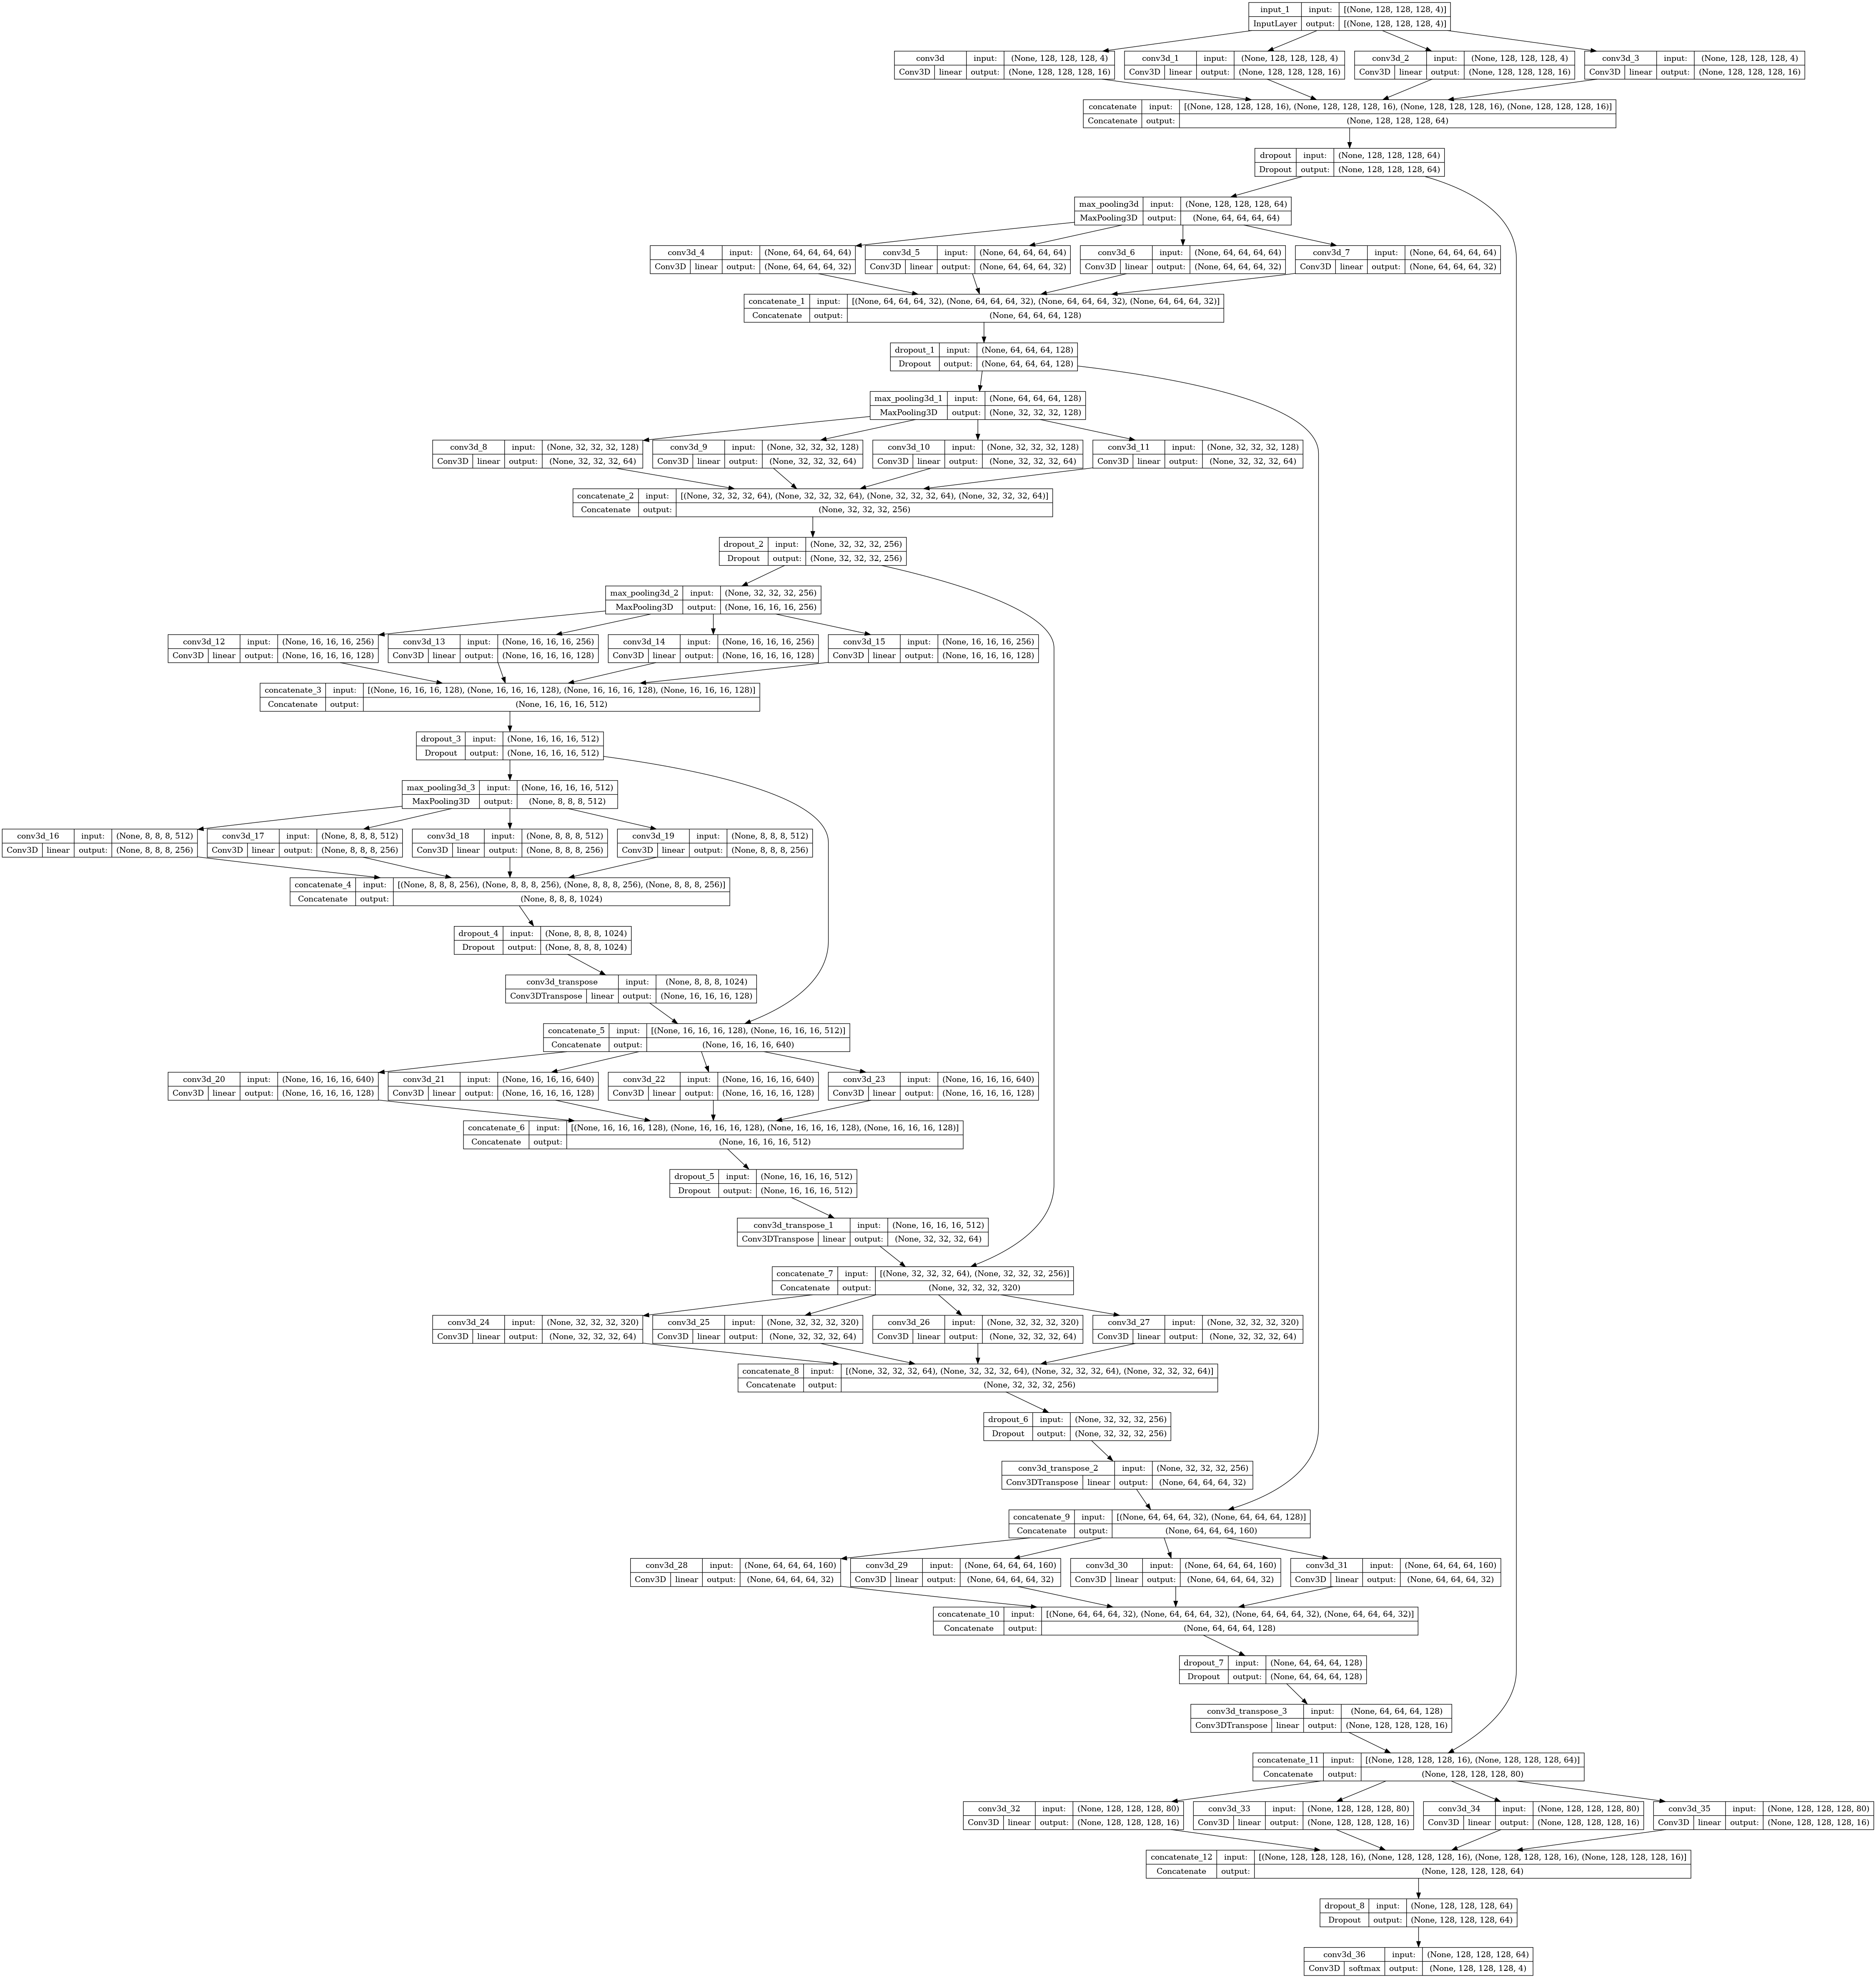

In [ ]:
# Plot the model as an image
plot_model = tf.keras.utils.plot_model
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [ ]:
print(model.input_shape)
print(model.output_shape)

(None, 128, 128, 128, 4)
(None, 128, 128, 128, 4)


In [ ]:
img_list = sorted(os.listdir(train_img_dir))
print(len(img_list))
msk_list = sorted(os.listdir(train_mask_dir))
print(len(msk_list))


311
311


In [ ]:
# img_list

In [ ]:
num_images = len(os.listdir(train_img_dir))

In [ ]:
img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+img_list[img_num])
test_mask = np.load(train_mask_dir+msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

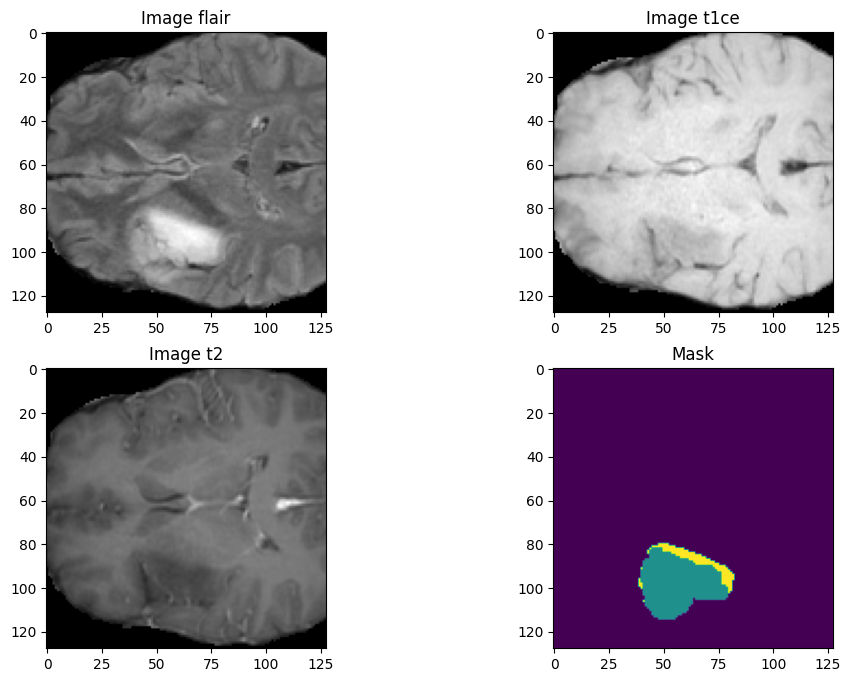

In [ ]:
# n_slice=random.randint(0, test_mask.shape[2])
n_slice = 65
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
#val_img_dir = "/kaggle/input/brats701515/input_data_128/val/images/"
#val_mask_dir = "/kaggle/input/brats701515/input_data_128/val/masks/"

train_img_list = sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))

#val_img_list = sorted(os.listdir(val_img_dir))
#val_mask_list = sorted(os.listdir(val_mask_dir))
#print(len(os.listdir(val_img_dir)))
#print(len(os.listdir(val_mask_dir)))

Image Agumentation for 3D Images

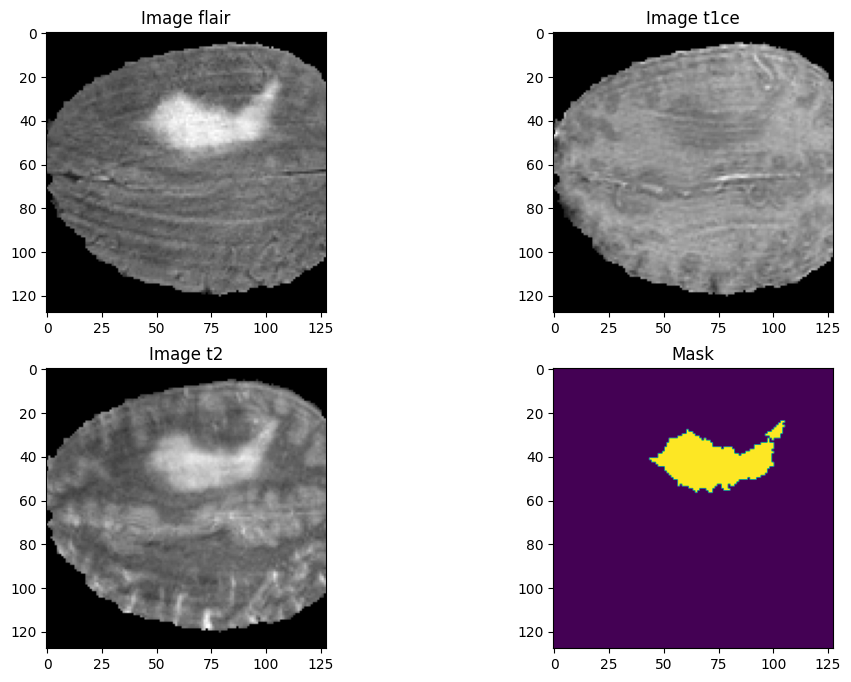

In [ ]:
image='/kaggle/input/brats701515/input_data_128/train/images/image_0.npy'
mask ='/kaggle/input/brats701515/input_data_128/train/masks/mask_0.npy'

img_num = random.randint(0,num_images-1)
test_img = np.load(image)
test_mask = np.load(mask)
test_mask = np.argmax(test_mask, axis=3)



n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
!pip install numpy albumentations

In [ ]:
import numpy as np
import albumentations as A
import os

# Define augmentation for both image and mask
augmentation = A.Compose([
     A.RandomRotate90(p=1),
     # A.HorizontalFlip(),
     # A.VerticalFlip(),
     # A.RandomBrightnessContrast(),
     # Add more transformations as needed
], additional_targets={'mask': 'image'})

print(val_img_list)
# Assuming images are stored in a numpy array called 'images'
augmented_images = []
augmented_masks = []
for image_path in val_img_list:
    image_path = os.path.join(val_img_dir, image_path)
    image = np.load(image_path).astype(np.float32)
    # Assuming mask paths have the same names with '_mask' appended
    mask_path = image_path.replace('.npy', '_mask.npy')
    mask = np.load(mask_path).astype(np.float32)

    augmented = augmentation(image=image, mask=mask)
    augmented_images.append(augmented['image'])
    augmented_masks.append(augmented['mask'])

augmented_images = np.array(augmented_images)
augmented_masks = np.array(augmented_masks)




['image_120.npy', 'image_126.npy', 'image_130.npy', 'image_132.npy', 'image_133.npy', 'image_149.npy', 'image_163.npy', 'image_179.npy', 'image_182.npy', 'image_20.npy', 'image_200.npy', 'image_209.npy', 'image_21.npy', 'image_228.npy', 'image_229.npy', 'image_23.npy', 'image_235.npy', 'image_24.npy', 'image_240.npy', 'image_251.npy', 'image_254.npy', 'image_256.npy', 'image_271.npy', 'image_277.npy', 'image_28.npy', 'image_280.npy', 'image_281.npy', 'image_294.npy', 'image_312.npy', 'image_32.npy', 'image_321.npy', 'image_323.npy', 'image_335.npy', 'image_342.npy', 'image_347.npy', 'image_349.npy', 'image_351.npy', 'image_37.npy', 'image_45.npy', 'image_5.npy', 'image_51.npy', 'image_52.npy', 'image_59.npy', 'image_66.npy', 'image_73.npy', 'image_75.npy', 'image_76.npy', 'image_80.npy', 'image_87.npy', 'image_94.npy', 'image_99.npy']


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/brats701515/input_data_128/val/images/image_120_mask.npy'

In [ ]:
print(augmented_images.shape)
print(augmented_images[0])
val=augmented_images[0]

n_slice=random.randint(0, val.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(val[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(val[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(val[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
#Create example 3D numpy image (shape: depth x height x width)
image='/kaggle/input/brats2020/input_data_128/train/images/image_0.npy'
mask ='/kaggle/input/brats2020/input_data_128/train/masks/mask_0.npy'

test_img = np.load(image)
print(test_img.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/brats2020/input_data_128/train/images/image_0.npy'

In [ ]:
batch_size=1
train_img_datagen = imageLoader(train_img_dir, train_img_list,  train_mask_dir, train_mask_list, batch_size)
#val_img_datagen = imageLoader(val_img_dir, val_img_list, val_mask_dir, val_mask_list, batch_size)

In [ ]:
img, msk = train_img_datagen.__next__()
img.shape
msk.shape

(1, 128, 128, 128, 4)

In [ ]:
# img_num = random.randint(0,img.shape[0]-1)
# test_img=img[img_num]
# test_mask=msk[img_num]
# test_mask=np.argmax(test_mask, axis=3)

# n_slice=random.randint(0, test_mask.shape[2])
# plt.figure(figsize=(12, 8))

# plt.subplot(221)
# plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
# plt.title('Image flair')
# plt.subplot(222)
# plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
# plt.title('Image t1ce')
# plt.subplot(223)
# plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
# plt.title('Image t2')
# plt.subplot(224)
# plt.imshow(test_mask[:,:,n_slice])
# plt.title('Mask')
# plt.show()

In [ ]:
!pip install classification-models-3D==1.0.7
!pip install keras-applications==1.0.8
!pip install segmentation-models-3D==1.0.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import segmentation_models_3D as sm
import tensorflow_addons as tfa

Segmentation Models: using `tf.keras` framework.


/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
steps_per_epoch = (len(train_img_list)//batch_size )+1


Defining the loss function and the optimizer function

In [ ]:
wt0, wt1, wt2, wt3 = 0.26,22.69,9.08,26.91

In [ ]:
import segmentation_models_3D as sm

dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)
cce = sm.losses.CategoricalCELoss()
combined_loss = dice_loss + cce

# mean_iou = tf.keras.metrics.MeanIoU(num_classes=4)
metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5), tf.keras.metrics.MeanIoU(num_classes=4)]



In [ ]:
model.compile(optimizer = optim, loss=dice_loss, metrics=metrics)
# print(model.summary())
print(2)

2


In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import MeanIoU

# Assuming necessary custom imports


def dice_score(o, t, eps=1e-8):
    num = 2 * (o * t).sum() + eps
    den = o.sum() + t.sum() + eps
    return num / den

def softmax_output_dice(target, output):
    ret = []
    # whole   wt
    o = output > 0
    t = target > 0
    ret.append(dice_score(o, t))

    # core   tc
    o = (output == 1) | (output == 3)
    t = (target == 1) | (target == 3)
    ret.append(dice_score(o, t))

    # active   et
    o = (output == 3)
    t = (target == 3)
    ret.append(dice_score(o, t))
    return ret

# Assuming train_img_list and train_mask_list are defined and hold the data
kf = KFold(n_splits=5, shuffle=True, random_state=42)

dice_scores_wt = []
dice_scores_tc = []
dice_scores_et = []

for fold, (train_index, val_index) in enumerate(kf.split(train_img_list)):
    print(f"Fold {fold+1}/5")

    metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5), tf.keras.metrics.MeanIoU(num_classes=4)]
    X_train_fold = [train_img_list[i] for i in train_index]
    y_train_fold = [train_mask_list[i] for i in train_index]
    X_val_fold = [train_img_list[i] for i in val_index]
    y_val_fold = [train_mask_list[i] for i in val_index]

    lr = 0.0001
    optim = tf.keras.optimizers.Adam(learning_rate=lr)

    model.compile(optimizer=optim, loss=dice_loss, metrics=metrics)

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'brats_3d_best_v2_fold_{fold}.hdf5', monitor='val_loss', save_best_only=True, verbose=1)

    train_data_gen = imageLoader(train_img_dir, X_train_fold, train_mask_dir, y_train_fold, batch_size)
    val_data_gen = imageLoader(train_img_dir, X_val_fold, train_mask_dir, y_val_fold, batch_size)

    history = model.fit(
        train_data_gen,
        epochs=100,
        steps_per_epoch=len(X_train_fold) // batch_size,
        validation_data=val_data_gen,
        validation_steps=len(X_val_fold) // batch_size,
        callbacks=[early_stopping, model_checkpoint]
    )

    val_dice_scores_wt = []
    val_dice_scores_tc = []
    val_dice_scores_et = []

    for i in range(len(X_val_fold)):
        val_img = X_val_fold[i]
        val_mask = y_val_fold[i]

        # Ensure val_img has the correct dimensions
        if len(val_img.shape) == 3:  # Add batch dimension if missing
            val_img = np.expand_dims(val_img, axis=0)
        elif len(val_img.shape) == 4 and val_img.shape[-1] == 1:  # Ensure single channel is in correct place
            val_img = np.expand_dims(val_img, axis=0)

        val_prediction = model.predict(val_img)
        val_mask_argmax = np.argmax(val_mask, axis=4)[0, :, :, :]
        val_prediction_argmax = np.argmax(val_prediction, axis=4)[0, :, :, :]

        dice_scores = softmax_output_dice(val_mask_argmax, val_prediction_argmax)
        val_dice_scores_wt.append(dice_scores[0])
        val_dice_scores_tc.append(dice_scores[1])
        val_dice_scores_et.append(dice_scores[2])

    avg_dice_score_et = sum(val_dice_scores_et) / len(val_dice_scores_et)
    avg_dice_score_wt = sum(val_dice_scores_wt) / len(val_dice_scores_wt)
    avg_dice_score_tc = sum(val_dice_scores_tc) / len(val_dice_scores_tc)

    dice_scores_wt.append(avg_dice_score_wt)
    dice_scores_tc.append(avg_dice_score_tc)
    dice_scores_et.append(avg_dice_score_et)

avg_dice_score_et = sum(dice_scores_et) / len(dice_scores_et)
avg_dice_score_wt = sum(dice_scores_wt) / len(dice_scores_wt)
avg_dice_score_tc = sum(dice_scores_tc) / len(dice_scores_tc)

print("Average Dice Score Enhanced Tumor:", avg_dice_score_et)
print("Average Dice Score Whole Tumor:", avg_dice_score_wt)
print("Average Dice Score Tumor Core:", avg_dice_score_tc)


Fold 1/5
Epoch 1/100
248/248 [==============================] - ETA: 0s - loss: 0.7543 - accuracy: 0.8980 - iou_score: 0.2298 - mean_io_u_1: 0.8741
Epoch 1: val_loss improved from inf to 0.75291, saving model to brats_3d_best_v2_fold_0.hdf5
248/248 [==============================] - 404s 1s/step - loss: 0.7543 - accuracy: 0.8980 - iou_score: 0.2298 - mean_io_u_1: 0.8741 - val_loss: 0.7529 - val_accuracy: 0.9338 - val_iou_score: 0.2403 - val_mean_io_u_1: 0.9167
Epoch 2/100
248/248 [==============================] - ETA: 0s - loss: 0.7548 - accuracy: 0.9285 - iou_score: 0.2345 - mean_io_u_1: 0.9100
Epoch 2: val_loss improved from 0.75291 to 0.75237, saving model to brats_3d_best_v2_fold_0.hdf5
248/248 [==============================] - 360s 1s/step - loss: 0.7548 - accuracy: 0.9285 - iou_score: 0.2345 - mean_io_u_1: 0.9100 - val_loss: 0.7524 - val_accuracy: 0.9086 - val_iou_score: 0.2322 - val_mean_io_u_1: 0.8868
Epoch 3/100
220/248 [=========================>....] - ETA: 34s - loss: 0.7

In [ ]:
import csv

# Assuming you have trained your model and obtained a history object

# Define a list to store training results
training_results = []

# Extract training metrics from the history object
epochs = range(1, len(history.history['accuracy']) + 1)
training_accuracy = history.history['accuracy']
training_iou_score = history.history['iou_score']



# validation_results = []

# Extract validation metrics from the history object (assuming it contains validation data)
validation_accuracy = history.history['val_accuracy']
validation_iou_score = history.history['val_iou_score']


# Append the training results to the list
for epoch, training_acc, training_iou_score, val_acc, val_iou_score in zip(epochs, training_accuracy, training_iou_score, validation_accuracy, validation_iou_score):
    training_results.append([epoch, training_acc, training_iou_score,  val_acc, val_iou_score])

# Define the training CSV file path
training_csv_file = '/kaggle/working/training_and_val_metrics.csv'

# Write the training results to a CSV file
with open(training_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Training accuracy', 'Training iou_score', 'Validation accuracy', 'Validation iou_score'])
    writer.writerows(training_results)

print(f'Training results saved to {training_csv_file}')
print(training_accuracy,training_iou_score)
print(validation_accuracy,validtion_iou_score)

Training results saved to /kaggle/working/training_and_val_metrics.csv
[0.9252384901046753, 0.9507536888122559, 0.9491864442825317, 0.960861325263977, 0.95111483335495, 0.9699147343635559, 0.961548924446106, 0.9753257632255554, 0.9650702476501465, 0.9769285321235657, 0.9679507613182068, 0.9787654876708984, 0.9701835513114929, 0.9779336452484131, 0.9695841073989868, 0.9789739847183228, 0.9737375974655151, 0.9811925888061523, 0.9749369621276855, 0.9819725751876831, 0.9752722382545471, 0.9829140901565552, 0.9769191741943359, 0.9832940101623535, 0.9780851006507874, 0.984185516834259, 0.9794875979423523, 0.9846110343933105, 0.9791032075881958, 0.984906017780304, 0.981513261795044, 0.9851822257041931, 0.9805905818939209, 0.9845139980316162, 0.982577919960022, 0.9855708479881287, 0.9835240840911865] 0.6822094917297363


NameError: name 'validtion_iou_score' is not defined

In [ ]:
test_img_dir = "/kaggle/input/brats701515/input_data_128/test/images/"
test_mask_dir = "/kaggle/input/brats701515/input_data_128/test/masks/"

test_img_list = sorted(os.listdir(test_img_dir))
test_mask_list = sorted(os.listdir(test_mask_dir))

batch_size=1
test_img_datagen = imageLoader(test_img_dir, test_img_list,  test_mask_dir, test_mask_list, batch_size)
test_steps_per_epoch =(len(test_img_list)//batch_size )+1

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/brats701515/input_data_128/test/images/'

In [ ]:
test_loss, test_accuracy, iou_score, mean_iou = model.evaluate(
    test_img_datagen,
    steps = test_steps_per_epoch,
    verbose=1
)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test IoU Score: {iou_score}')



27/27 [==============================] - 39s 1s/step - loss: 0.3106 - accuracy: 0.9734 - iou_score: 0.5787 - mean_io_u_2: 0.9555
Test Loss: 0.3106149137020111
Test Accuracy: 0.9734042882919312
Test IoU Score: 0.578650712966919


In [ ]:
import csv

# Define the test results
test_results = [
    ['Test Loss', test_loss],
    ['Test Accuracy', test_accuracy],
    ['Test IoU Score', iou_score]
]

# Define the CSV file path
test_csv_file = '/kaggle/working/test_results.csv'

# Write the test results to a CSV file
with open(test_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(test_results)

print(f'Test results saved to {test_csv_file}')
print(test_results)

Test results saved to /kaggle/working/test_results.csv
[['Test Loss', 0.3106149137020111], ['Test Accuracy', 0.9734042882919312], ['Test IoU Score', 0.578650712966919]]


In [ ]:
def dice_score(o, t, eps=1e-8):
    num = 2*(o*t).sum() + eps
    den = o.sum() + t.sum() + eps
    return num/den

def softmax_output_dice(target,output):
    ret = []

    # whole   wt
    o = output > 0; t = target > 0 # ce
    ret += dice_score(o, t),

    # core   tc
    o = (output == 1) | (output == 3)
    t = (target == 1) | (target == 3)
    ret += dice_score(o, t),

    # active   et
    o = (output == 3);t = (target == 3)
    ret += dice_score(o, t),

    return ret


dice_scores_wt = []
dice_scores_tc = []
dice_scores_et = []
num_classes = 4

for batch in range(test_steps_per_epoch):

    test_img, test_mask = next(test_img_datagen)
    test_prediction = model.predict(test_img)

    test_mask_argmax=np.argmax(test_mask, axis=4)[0,:,:,:]
    test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

    tensor = softmax_output_dice(test_mask_argmax, test_prediction_argmax)
    dice_batch = tensor[0]
    dice_scores_wt.append(dice_batch)
    dice_scores_tc.append(tensor[1])
    dice_scores_et.append(tensor[2])


print("Dice Scores for Unet trained for 150 epochs with dice loss and focal loss:")
average_dice_score_et = sum(dice_scores_et) / len(dice_scores_et)
print("Average Dice Score et:", average_dice_score_et)
average_dice_score_wt = sum(dice_scores_wt) / len(dice_scores_wt)
print("Average Dice Score wt:", average_dice_score_wt)
average_dice_score_tc = sum(dice_scores_tc) / len(dice_scores_tc)
print("Average Dice Score tc:", average_dice_score_tc)



import csv

# Define the test results
average_dice_scores = [
    ['Enhanced Tumor', average_dice_score_et],
    ['Whole Tumor', average_dice_score_wt],
    ['Tumor Core', average_dice_score_tc]
]

# Define the CSV file path
test_csv_file = '/kaggle/working/dice_scores.csv'

# Write the test results to a CSV file
with open(test_csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(average_dice_scores)

print(f'dice scores results saved to {test_csv_file}')


1/1 [==============================] - 0s 50ms/step
Dice Scores for Unet trained for 150 epochs with dice loss and focal loss:
Average Dice Score et: 0.5888112880071339
Average Dice Score wt: 0.813909199857968
Average Dice Score tc: 0.636607384750715
dice scores results saved to /kaggle/working/dice_scores.csv


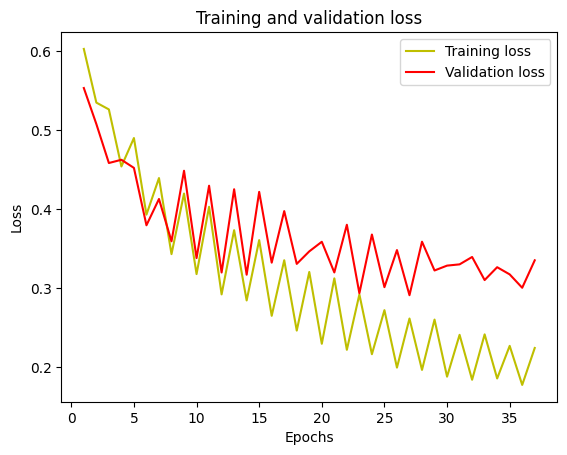

In [ ]:
# metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5), mean_iou]
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['mean_io_u']
val_acc = history.history['val_mean_io_u']

plt.plot(epochs, acc, 'y', label='Training mean_iou')
plt.plot(epochs, val_acc, 'r', label='Validation mean_iou')
plt.title('Training and validation mean_iou')
plt.xlabel('Epochs')
plt.ylabel('mean_iou')
plt.legend()
plt.show()

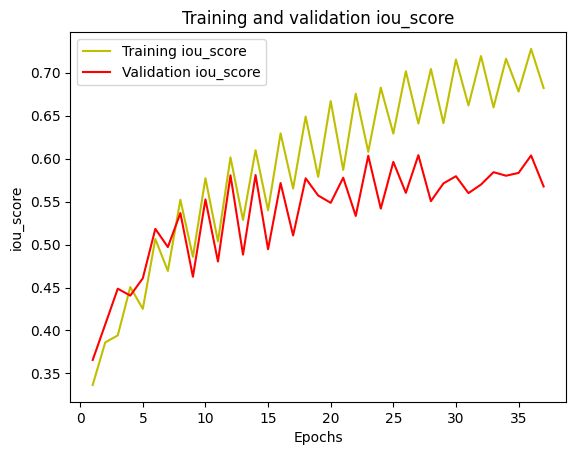

In [ ]:
acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training iou_score')
plt.plot(epochs, val_acc, 'r', label='Validation iou_score')
plt.title('Training and validation iou_score')
plt.xlabel('Epochs')
plt.ylabel('iou_score')
plt.legend()
plt.show()

In [ ]:


import tensorflow as tf
from keras.losses import Loss
from keras.utils import get_custom_objects
get_custom_objects().update({"dice_loss": dice_loss})


get_custom_objects().update({"iou_score": sm.metrics.IOUScore(threshold=0.5)})





In [ ]:
my_model = load_model('/kaggle/working/brats_3d_best.hdf5')
img_num = 82

test_img = np.load("/kaggle/input/brats701515/input_data_128/test/images/image_"+str(img_num)+".npy")

test_mask = np.load("/kaggle/input/brats701515/input_data_128/test/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


print(test_prediction_argmax.shape)
print(test_mask_argmax.shape)
print(np.unique(test_mask_argmax))
print(np.unique(test_prediction_argmax))

1/1 [==============================] - 1s 600ms/step
(128, 128, 128)
(128, 128, 128)
[0 1 2 3]
[0 1 2 3]


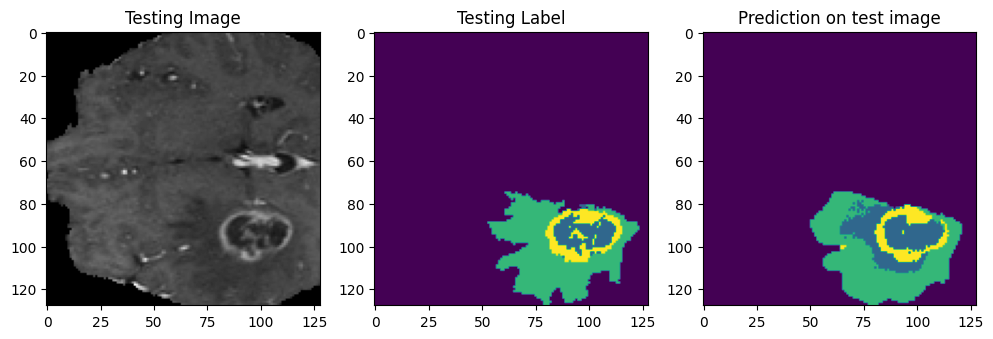

In [ ]:
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 50
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()